In [1]:
import utilities as ut
import networkx as nx
import Complexity as cx
import matplotlib.pyplot as plt
import collections
from math import log
import numpy as np
import pandas as pd

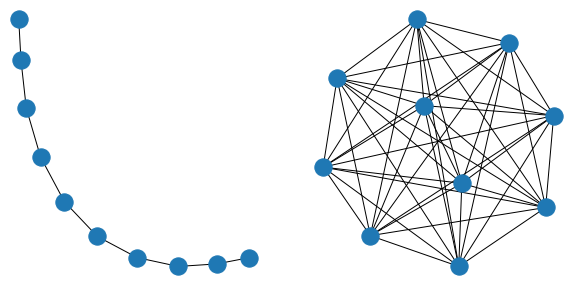

In [3]:
n = 10
G1 = nx.path_graph(n)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
nx.draw(G1)
G2=nx.gnp_random_graph(n,1)
plt.subplot(1,2,2)
nx.draw(G2)
plt.show()
plt.savefig("figures/path_clique.eps",format="eps")

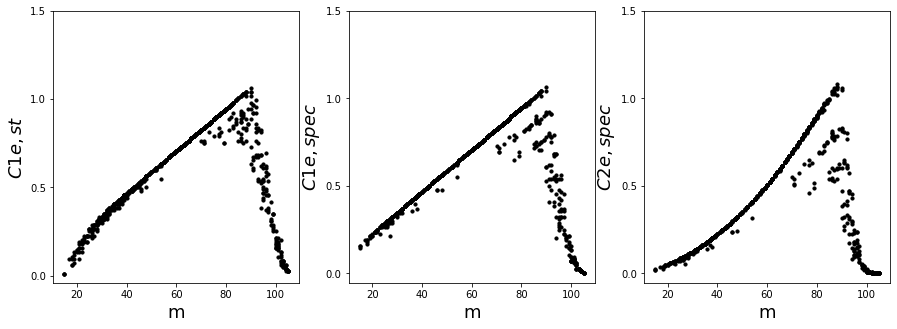

In [7]:
n=15
graphs,df = ut.random_networks(n,False,1000)

c1est = [cx.C1est(g) for g in graphs]
c1espec = [cx.C1espec(g) for g in graphs]
c2espec = [cx.C2espec(g) for g in graphs]

fig,axes = plt.subplots(1, 3,figsize = ([15,5]))
axes[0].scatter(df["Number_of_edges"],c1est,s=10,color = "black")
axes[1].scatter(df["Number_of_edges"],c1espec,s=10,color = "black")
axes[2].scatter(df["Number_of_edges"],c2espec,s=10,color = "black")
for item in axes:
    item.set_yticks([0,0.5,1,1.5])
    item.set_xlabel("m",fontsize =18)
axes[0].set_ylabel("$C1e,st$",fontsize= 18)
axes[1].set_ylabel("$C1e,spec$",fontsize= 18)
axes[2].set_ylabel("$C2e,spec$",fontsize= 18)
plt.show()
fig.savefig("figures/subgraph_measures.eps",format="eps")

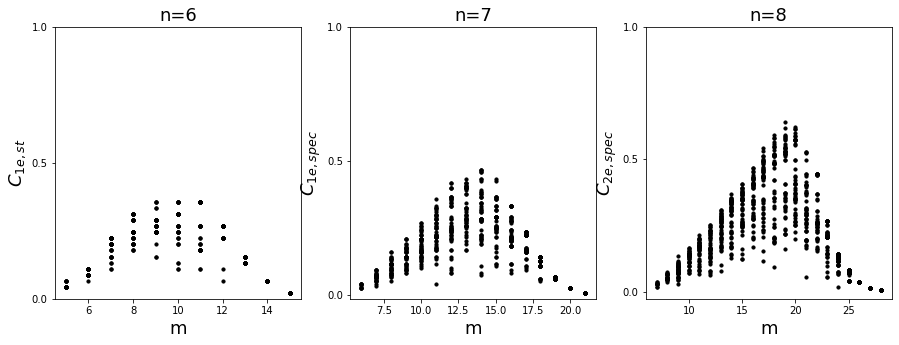

In [8]:
n = [6,7,8]
c2graphs= [];dfs= []
for item in n:
    g,d = ut.random_networks(item,True,50)
    c2graphs.append(g);dfs.append(d)

c2especs = []
for item in c2graphs:
    temp_result = [cx.C2espec(g) for g in item]
    c2especs.append(temp_result)

fig,axes = plt.subplots(1,3,figsize = (15,5))
for i in range(len(n)):
    axes[i].scatter(dfs[i]["Number_of_edges"],c2especs[i],s=10,color = "black")
    axes[i].set_yticks([0,0.5,1])
    axes[i].set_title("n="+str(n[i]),fontsize= 18)
    axes[i].set_xlabel("m",fontsize= 18)
axes[0].set_ylabel("$C_{1e,st}$",fontsize= 18)
axes[1].set_ylabel("$C_{1e,spec}$",fontsize= 18)
axes[2].set_ylabel("$C_{2e,spec}$",fontsize= 18)
plt.show()
fig.savefig("figures/c2espec.eps",format="eps")

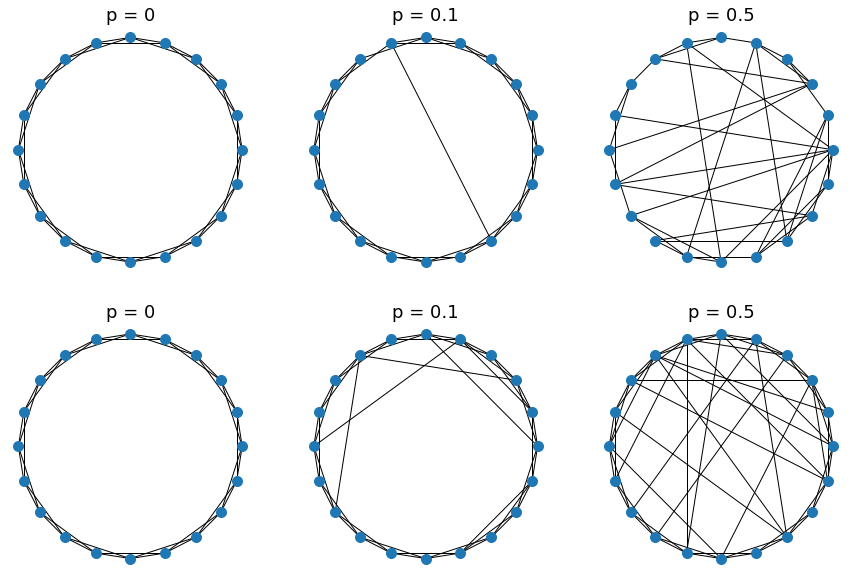

<Figure size 432x288 with 0 Axes>

In [9]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
nx.draw_circular(nx.watts_strogatz_graph(20,4,0),node_size=100)
plt.title("p = 0",fontsize= 18)
plt.subplot(2,3,2)
nx.draw_circular(nx.watts_strogatz_graph(20,4,0.1),node_size=100)
plt.title("p = 0.1",fontsize= 18)
plt.subplot(2,3,3)
nx.draw_circular(nx.watts_strogatz_graph(20,4,0.5),node_size=100)
plt.title("p = 0.5",fontsize= 18)
plt.subplot(2,3,4)
nx.draw_circular(nx.newman_watts_strogatz_graph(20,4,0),node_size=100)
plt.title("p = 0",fontsize= 18)
plt.subplot(2,3,5)
nx.draw_circular(nx.newman_watts_strogatz_graph(20,4,0.1),node_size=100)
plt.title("p = 0.1",fontsize= 18)
plt.subplot(2,3,6)
nx.draw_circular(nx.newman_watts_strogatz_graph(20,4,0.5),node_size=100)
plt.title("p = 0.5",fontsize= 18)
plt.show()
plt.savefig("figures/small_world_network_model.eps",format = "eps")

In [10]:
def degree_distribution(G):
    degree_sequence = sorted([d for n, d in G.degree()],reverse = True)
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
    deg = list(deg)
    cnt = list(cnt)
    return deg,cnt

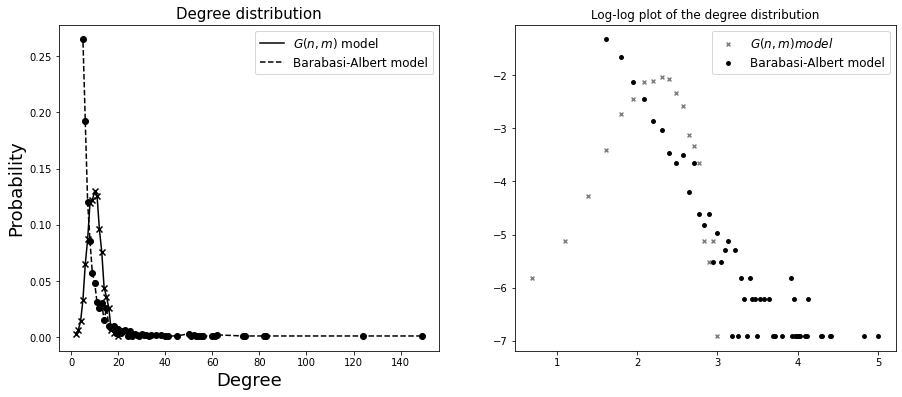

<Figure size 432x288 with 0 Axes>

In [12]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
G = nx.gnm_random_graph(1000,5000)
deg,cnt = degree_distribution(G)
cnt = [item/1000 for item in cnt]
plt.plot(deg,cnt,color = "black",label="$G(n,m)$ model")

G = nx.barabasi_albert_graph(1000,5)
deg1,cnt1 = degree_distribution(G,)
cnt1 = [item/1000 for item in cnt1]
plt.plot(deg1,cnt1,'--',color = "black",label = "Barabasi-Albert model")
plt.legend(fontsize=12)
plt.scatter(deg,cnt,color = "black",marker = "x")
plt.scatter(deg1,cnt1,color = "black")
plt.xlabel("Degree",fontsize= 18)
plt.ylabel("Probability",fontsize= 18)
plt.title("Degree distribution",fontsize= 15)

plt.subplot(1,2,2)
log_deg = [log(item) for item in deg];log_cnt = [log(item) for item in cnt]
log_deg1 = [log(item) for item in deg1];log_cnt1 = [log(item) for item in cnt1]
plt.scatter(log_deg,log_cnt,marker = "x",color = "grey",s=15,label = "$G(n,m) model$")
plt.scatter(log_deg1,log_cnt1,marker = "o",color = "black",s=15,label = "Barabasi-Albert model")
plt.legend(fontsize=12)
plt.title("Log-log plot of the degree distribution")
plt.show()
plt.savefig("figures/degree_distribution.eps",format = "eps")

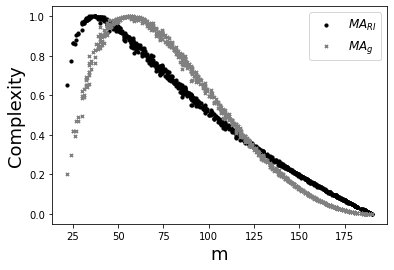

<Figure size 432x288 with 0 Axes>

In [13]:
n = 20
graphs,df = ut.random_networks(n,False,1000)
mari = [cx.MAri(g) for g in graphs]
mag = [cx.MAg(g) for g in graphs]

plt.scatter(df["Number_of_edges"],mari,label = "$MA_{RI}$",color = "black",marker = "o",s=10)
plt.scatter(df["Number_of_edges"],mag, label = "$MA_{g}$",color = "grey",marker = "x",s=10)
plt.legend(fontsize=12)
plt.xlabel("m",fontsize= 18)
plt.ylabel("Complexity",fontsize= 18)
plt.show()
plt.savefig("figures/mariandmag.eps",format="eps")

In [14]:
methods = ["C1est","C1espec","C2espec","OdC","MAg","MAri","Cr","Ce"]

In [15]:
#Generates random graphs and data
n=7
graphs,df = ut.random_networks(n=n,use_all_m = True,sample_number = 50)

In [16]:
#Find the complexities of the graphs
results = []
for item in methods:
    method = getattr(cx,item)
    temp_result = [method(g) for g in graphs]
    results.append(temp_result)

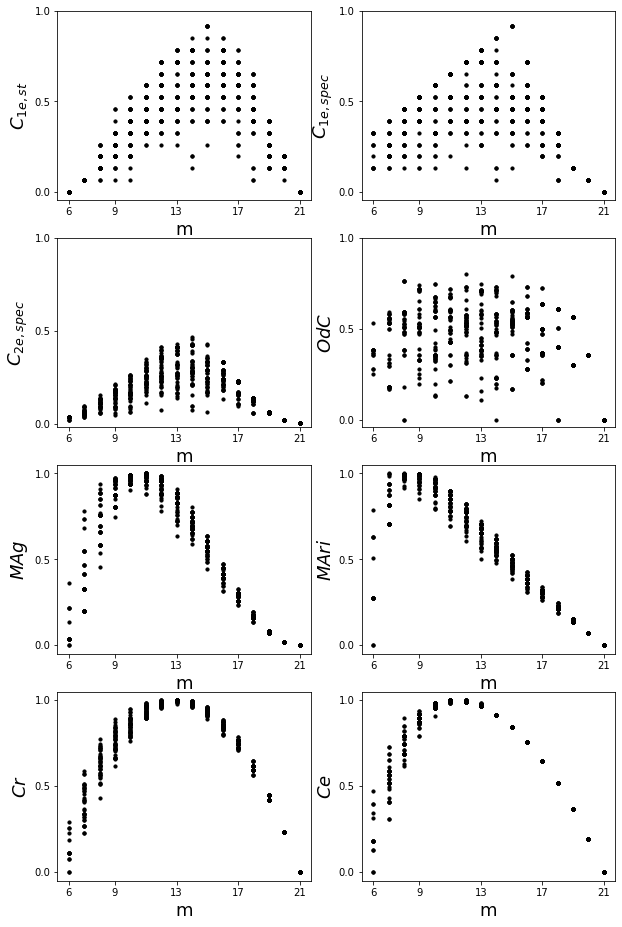

<Figure size 432x288 with 0 Axes>

In [17]:
n=7
c=0
fig,axes = plt.subplots(4,2,figsize = (10,16))
xticks = np.linspace(n-1,n*(n-1)/2,5)
xticks = [int(item) for item in xticks]
for i in range(4):
    for j in range(2):
        axes[i][j].scatter(df["Number_of_edges"],results[c],s=10,color = "black")
        axes[i][j].set_yticks([0,0.5,1])
        axes[i][j].set_xticks(xticks)
        axes[i][j].set_xlabel("m",fontsize = 18)
        axes[i][j].set_ylabel("$"+methods[c]+"$",fontsize = 18)
        c+=1
axes[0][0].set_ylabel("$C_{1e,st}$",fontsize= 18)
axes[0][1].set_ylabel("$C_{1e,spec}$",fontsize= 18)
axes[1][0].set_ylabel("$C_{2e,spec}$",fontsize= 18)
plt.show()
plt.savefig("figures/complexities.eps",format="eps")

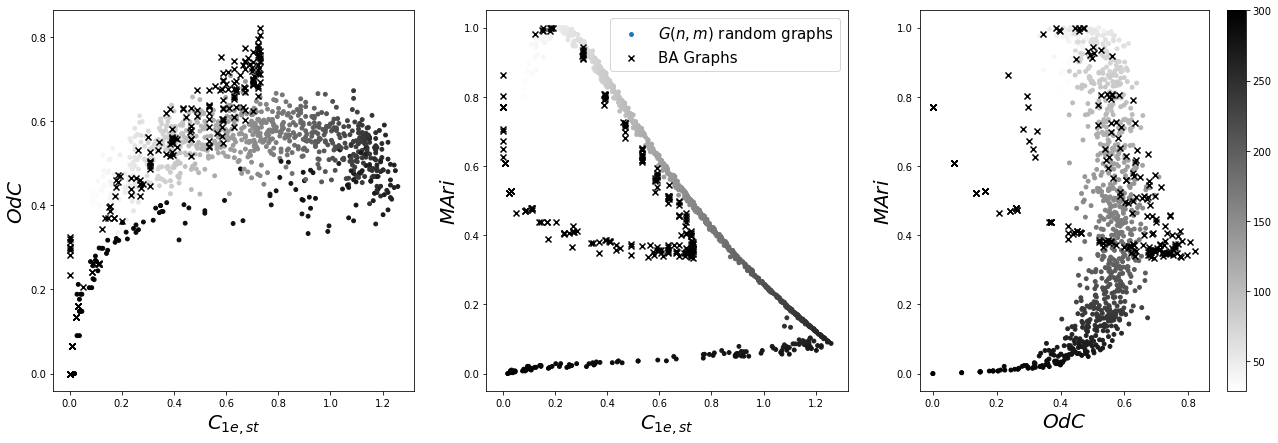

<Figure size 432x288 with 0 Axes>

In [18]:
n=25
corr_use_graphs,df = ut.random_networks(n,False,1000)
corr_results = []
corr_results.append([cx.C1est(g) for g in corr_use_graphs])
corr_results.append([cx.OdC(g) for g in corr_use_graphs])
corr_results.append([cx.MAri(g) for g in corr_use_graphs])

corr_use_BA = ut.BA_random_graphs(n,200)
corr_results_BA = []
corr_results_BA.append([cx.C1est(g) for g in corr_use_BA])
corr_results_BA.append([cx.OdC(g) for g in corr_use_BA])
corr_results_BA.append([cx.MAri(g) for g in corr_use_BA])

plt.figure(figsize=(22,7))
plt.subplot(1,3,1)
plt.scatter(corr_results[0],
                corr_results[1],
                s=15,c = df["Number_of_edges"],cmap = "binary",label = "$G(n,m)$ random graphs")
plt.scatter(corr_results_BA[0],corr_results_BA[1],color="black",marker = "x",label = "BA Graphs")
plt.xlabel("$C_{1e,st}$",fontsize = 20);plt.ylabel("$OdC$",fontsize = 20);

plt.subplot(1,3,2)
plt.scatter(corr_results[0],
                corr_results[2],
                s=15,c = df["Number_of_edges"],cmap = "binary",label = "$G(n,m)$ random graphs")
plt.scatter(corr_results_BA[0],corr_results_BA[2],color="black",marker = "x",label = "BA Graphs")
plt.xlabel("$C_{1e,st}$",fontsize = 20);plt.ylabel("$MAri$",fontsize = 20);
plt.legend(fontsize = 15)
plt.subplot(1,3,3)
plt.scatter(corr_results[1],
                corr_results[2],
                s=15,c = df["Number_of_edges"],cmap = "binary",label = "$G(n,m)$ random graphs")
plt.colorbar()
plt.scatter(corr_results_BA[1],corr_results_BA[2],color="black",marker = "x",label = "BA Graphs")
plt.xlabel("$OdC$",fontsize = 20);plt.ylabel("$MAri$",fontsize = 20);
plt.show()
plt.savefig("figures/complexity_correlation.eps",format = "eps")

In [19]:
#Generates special random graphs
n = 20
randoms,random_df = ut.random_networks(n,False,500)
BA_graphs = ut.BA_random_graphs(n=n,sample_number = 100)
WS_graphs = ut.WS_random_graphs(n=n,sample_number = 100)
NW_graphs = ut.NW_random_graphs(n=n,sample_number = 100)

#Calculates the complexity of special random graphs
rd_result = []
for item in methods:
    method = getattr(cx,item)
    temp_result = [method(g) for g in randoms]
    rd_result.append(temp_result)
BA_result = []
for item in methods:
    method = getattr(cx,item)
    temp_result = [method(g) for g in BA_graphs]
    BA_result.append(temp_result)

WS_result = []
for item in methods:
    method = getattr(cx,item)
    temp_result = [method(g) for g in WS_graphs]
    WS_result.append(temp_result)

NW_result = []
for item in methods:
    method = getattr(cx,item)
    temp_result = [method(g) for g in NW_graphs]
    NW_result.append(temp_result)

# Calculates the complexities of special graphs
c=0
fig,axes = plt.subplots(4,2,figsize = (10,16))
xticks = np.linspace(n-1,n*(n-1)/2,5)
xticks = [int(item) for item in xticks]
for i in range(4):
    for j in range(2):
        axes[i][j].scatter([len(g.edges) for g in randoms],rd_result[c],s=15,color = "black",alpha = 0.7,label = "$G(n,m)$")
        axes[i][j].scatter([len(g.edges) for g in BA_graphs],BA_result[c],s=15,color = "green",label = "BA")
        axes[i][j].scatter([len(g.edges) for g in WS_graphs],WS_result[c],marker = "x",s=15,color = "red",label = "WS")
        axes[i][j].scatter([len(g.edges) for g in NW_graphs],NW_result[c],marker = "s",s=15,color = "blue",label = "NW")
        axes[i][j].set_yticks([0,0.5,1])
        axes[i][j].set_ylabel("$"+methods[c]+"$",fontsize = 20)
        axes[i][j].set_xlabel("m",fontsize = 20)
        axes[i][j].set_xticks(xticks)
        c+=1
axes[0][0].set_ylabel("$C_{1e,st}$")
axes[0][1].set_ylabel("$C_{1e,spec}$")
axes[1][0].set_ylabel("$C_{2e,spec}$")
axes[0][0].legend()
plt.legend(fontsize = 12)
plt.show()
plt.savefig("figures/complexities_sp.eps",format="eps")

In [ ]:
#Analyse Complement graphs complexity
graphs,df = ut.random_networks(25,False,1000)
BA_graphs = ut.BA_random_graphs(25, 100)
complement_graphs = [ut.complement_graph(g) for g in graphs]
c = []
g = []
edges = []
for i in range(len(complement_graphs)):
    if complement_graphs[i] !=None:
        c.append(complement_graphs[i])
        g.append(graphs[i])
        edges.append(df["Number_of_edges"][i])
    
BA_comp = [ut.complement_graph(g) for g in BA_graphs]
ba_c = []
ba_g = []
for i in range(len(BA_comp)):
    if BA_comp[i] !=None:
        ba_c.append(BA_comp[i])
        ba_g.append(BA_graphs[i])

results1 = [cx.OdC(item) for item in g]
results_c = [cx.OdC(g) for g in c]
ba_result = [cx.OdC(g) for g in ba_c]
ba_result_c = [cx.OdC(g) for g in ba_g]

results2 = [cx.MAri(item) for item in g]
results_c_1 = [cx.MAri(g) for g in c]
ba_result_1 = [cx.MAri(g) for g in ba_c]
ba_result_c_1 = [cx.MAri(g) for g in ba_g]

results3 = [cx.C1est(item) for item in g]
results_c_2 = [cx.C1est(g) for g in c]
ba_result_2 = [cx.C1est(g) for g in ba_c]
ba_result_c_2 = [cx.C1est(g) for g in ba_g]

plt.figure(figsize = (18,5))
plt.subplot(1,3,1)


plt.scatter(results1,results_c,c = edges,cmap="gray",label = "$G(n,m)$ random graphs")
plt.colorbar()
plt.scatter(ba_result,ba_result_c,marker = "x",label = "BA graphs")
plt.xlabel("$OdC$ of original graph",fontsize = 20)
plt.ylabel("$OdC$ of complement graph",fontsize = 20)
plt.xticks([0,0.5,1])
plt.yticks([0,0.5,1])
plt.legend(fontsize = 12)
plt.subplot(1,3,2)
plt.scatter(results2,results_c_1,c = edges,cmap="gray",label = "$G(n,m)$ random graphs")
plt.colorbar()
plt.scatter(ba_result_1,ba_result_c_1,marker = "x",label = "BA graphs")
plt.xlabel("$MAri$ of original graph",fontsize = 20)
plt.ylabel("$MAri$ of complement graph",fontsize = 20)
plt.xticks([0,0.5,1])
plt.yticks([0,0.5,1])
plt.subplot(1,3,3)
plt.scatter(results3,results_c_2,c = edges,cmap="gray",label = "$G(n,m)$ random graphs")
plt.colorbar()
plt.scatter(ba_result_2,ba_result_c_2,marker = "x",label = "BA graphs")
plt.xlabel("$C_{1e,st}$ of original graph",fontsize = 20)
plt.ylabel("$C_{1e,st}$ of complement graph",fontsize = 20)
plt.xticks([0,0.5,1])
plt.yticks([0,0.5,1])
plt.legend(fontsize = 12)
plt.show()
plt.savefig("figures/complement.eps",format="eps")

In [ ]:
from IPython import display
display.Image("./figures/configuration_model.png")

In [ ]:
index = ["dolphins","pdzbase","hamsterster","Roget","flight","GBPT_train"]
index_bus = ["london","paris","berlin","sydney","detroit","beijing"]
load_path = ["real_networks/processed/"+item+".csv" for item in index]
load_path_bus = ["bus/processed/"+item+".csv" for item in index_bus]
load_path_bus_m = ["bus/modified/m_"+item+".csv" for item in index_bus]
graphs = [ut.df_to_network(pd.read_csv(item)) for item in load_path]
bus = [ut.df_to_network(pd.read_csv(item)) for item in load_path_bus]
bus_m = [ut.df_to_network(pd.read_csv(item)) for item in load_path_bus_m]

In [ ]:
for i in range (len(graphs)):
    print(index[i]+" n-"+str(len(graphs[i].nodes))+" m-"+str(len(graphs[i].edges)))
for i in range (len(bus)):
    print(index_bus[i]+" n-"+str(len(bus[i].nodes))+" m-"+str(len(bus[i].edges)))
for i in range (len(bus_m)):
    print("m_"+index_bus[i]+" n-"+str(len(bus_m[i].nodes))+" m-"+str(len(bus_m[i].edges)))
l = [nx.average_shortest_path_length(g) for g in graphs]       
l_bus = [nx.average_shortest_path_length(g) for g in bus]
l_bus_m = [nx.average_shortest_path_length(g) for g in bus_m]
for i in range(len(index)):
    print("L - "+index[i]+" - " + str(l[i]))
for i in range(len(index_bus)):
    print("L - "+index_bus[i]+" - " + str(l_bus[i])) 
for i in range(len(index_bus)):
    print("L - m_"+index_bus[i]+" - " + str(l_bus_m[i]))
lr = [ut.lr(g) for g in graphs]
for i in range(len(index)):
    print("Lr - "+index[i]+" - " + str(lr[i]))         
lr_bus = [ut.lr(g) for g in bus]
for i in range(len(index_bus)):
    print("Lr - "+index_bus[i]+" - " + str(lr_bus[i]))  
lr_bus_m = [ut.lr(g) for g in bus_m]
for i in range(len(index_bus)):
    print("Lr - m_"+index_bus[i]+" - " + str(lr_bus_m[i]))
result_g = [cx.MAri(g) for g in graphs]
result_bus = [cx.MAri(g) for g in bus]
result_bus_m = [cx.MAri(g) for g in bus_m]
for i in range(len(result_g)):
    print(index[i] + " - "+str(result_g[i]))
for i in range(len(result_g)):
    print(index_bus[i] + " - "+str(result_bus[i]))
for i in range(len(result_g)):
    print("m_"+index_bus[i] + " - "+str(result_bus_m[i]))
generated_graphs = [
    nx.gnm_random_graph(875,4000),
    nx.watts_strogatz_graph(875,10,0.05),
    nx.newman_watts_strogatz_graph(875,10,0.05),
    nx.barabasi_albert_graph(875,5)
]
print("G(n,m) network: n =" + str(len(generated_graphs[0].nodes)) +"\n" + "m=" +str(len(generated_graphs[0].edges))+"\nL="+str(nx.average_shortest_path_length(generated_graphs[0]))+"\nL_r="+str(ut.lr(generated_graphs[0]))+"\nMAri="+str(cx.MAri(generated_graphs[0]))+"\nOdC="+str(cx.OdC(generated_graphs[0]))+"\n")
print("WS network: n =" + str(len(generated_graphs[1].nodes)) +"\n" + "m=" +str(len(generated_graphs[1].edges))+"\nL="+str(nx.average_shortest_path_length(generated_graphs[1]))+"\nL_r="+str(ut.lr(generated_graphs[1]))+"\nMAri="+str(cx.MAri(generated_graphs[1]))+"\nOdC="+str(cx.OdC(generated_graphs[1]))+"\n")
print("NW network: n =" + str(len(generated_graphs[2].nodes)) +"\n" + "m=" +str(len(generated_graphs[2].edges))+"\nL="+str(nx.average_shortest_path_length(generated_graphs[2]))+"\nL_r="+str(ut.lr(generated_graphs[2]))+"\nMAri="+str(cx.MAri(generated_graphs[2]))+"\nOdC="+str(cx.OdC(generated_graphs[2]))+"\n")
print("BA network: n =" + str(len(generated_graphs[3].nodes)) +"\n" + "m=" +str(len(generated_graphs[3].edges))+"\nL="+str(nx.average_shortest_path_length(generated_graphs[3]))+"\nL_r="+str(ut.lr(generated_graphs[3]))+"\nMAri="+str(cx.MAri(generated_graphs[3]))+"\nOdC="+str(cx.OdC(generated_graphs[3]))+"\n")
l_gg_ratio = [nx.average_shortest_path_length(item)/ut.lr(item) for item in generated_graphs]
gg_result = [cx.MAri(item) for item in generated_graphs]
plt.figure(figsize=(16,8))
l_ratio = [item0/item1 for item0,item1 in zip(l,lr)]
l_ratio_bus = [item0/item1 for item0,item1 in zip(l_bus,lr_bus)]
l_ratio_bus_m = [item0/item1 for item0,item1 in zip(l_bus_m,lr_bus_m)]
plt.scatter(l_ratio,result_g,color = "black",s=50,label = "Real networks")
plt.scatter(l_ratio_bus,result_bus,color = "red",s=50,marker = "x",label ="Bus networks")
plt.scatter(l_ratio_bus_m,result_bus_m,color = "blue",marker = "^",s=50,label = "Modified bus networks")
plt.scatter(l_gg_ratio,gg_result,color = "green",marker = "s",s=50,label = "Generated graphs")
plt.legend(fontsize = 15)
plt.xlabel("$L/L_r$",fontsize = 20)
plt.ylabel("$MAri$",fontsize = 20)
plt.yticks([0,0.25,0.5,0.75,1])
for i in range(len(index)):
    if i !=2:
        plt.annotate(str(i+1),(l_ratio[i]+0.02,result_g[i]+0.02),fontsize= 15,color = "grey")
for i in range(len(index)):
    plt.annotate(str(i+7),(l_ratio_bus[i]+0.02,result_bus[i]+0.02),fontsize= 15,color = "grey")
for i in range(len(index)):
    plt.annotate(str(i+13),(l_ratio_bus_m[i]+0.02,result_bus_m[i]+0.02),fontsize= 15,color = "grey")
for i in range(len(generated_graphs)):
    if i!= 1:
        plt.annotate(str(i+19),(l_gg_ratio[i]+0.02,gg_result[i]+0.016),fontsize= 15,color = "grey")
plt.annotate(3,(1,0.92),fontsize= 15,color = "grey")
plt.annotate(20,(1.55,0.93),fontsize=15,color = "grey")
plt.savefig("figures/real_networks.eps",format = "eps")